# Declaration of Originality

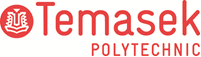

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :
* Tutorial Group                :  
* Tutor						    :  
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [515]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [516]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "student_depression_dataset.csv"
df = pd.read_csv(FILE_PATH)
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## 2.2 Summary Statistics

In [517]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## 2.3 Data Cleaning

In [518]:
## Check for missing data
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [519]:
## Describe data distribution
df.describe(include='all')

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901,27901.000000,27901,27901,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901,27901,27901,27901,27901.000000,27901,27901,27901.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15547,NaN,1570,27870,NaN,NaN,NaN,NaN,NaN,8310,10317,6080,17656,NaN,6715,14398,NaN
mean,70442.149421,NaN,25.822300,NaN,NaN,3.141214,0.000430,7.656104,2.943837,0.000681,NaN,NaN,NaN,NaN,7.156984,NaN,NaN,0.585499
std,40641.175216,NaN,4.905687,NaN,NaN,1.381465,0.043992,1.470707,1.361148,0.044394,NaN,NaN,NaN,NaN,3.707642,NaN,NaN,0.492645
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35039.000000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70684.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105818.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


Findings: No anomalies found

In [520]:
## Drop Useless Columns
df = df.drop(['id', 'Profession', 'City', 'Work Pressure', 'Job Satisfaction'], axis=1)
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [521]:
# Rename columns to be code friendly
new_names = {
    'Academic Pressure': 'academic_pressure',
    'Work/Study Hours': 'study_hours',
    'Study Satisfaction': 'study_satisfaction',
    'Sleep Duration': 'sleep_duration',
    'Dietary Habits': 'dietary_habits',
    'Degree': 'degree',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Financial Stress': 'financial_stress',
    'Family History of Mental Illness': 'family_history',
    'Depression': 'depression',
    'Gender': 'gender',
    'Age': 'age',
    'CGPA': 'cgpa'
}

# Apply the renaming
df = df.rename(columns=new_names)

df

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_history,depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [522]:
## Check datatypes for each column
df.dtypes

gender                 object
age                   float64
academic_pressure     float64
cgpa                  float64
study_satisfaction    float64
sleep_duration         object
dietary_habits         object
degree                 object
suicidal_thoughts      object
study_hours           float64
financial_stress       object
family_history         object
depression              int64
dtype: object

In [523]:
## Check datatypes for each column
col_categorical = df.select_dtypes(include=['object']).columns ## Select all categorical columns

## Print data about categorical column
'''
nunique(): Return total number of unique values in column
unique(): Return unique values in column
'''
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')

print(df['degree'].value_counts())

gender (2): ['Male' 'Female']
sleep_duration (5): ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
dietary_habits (4): ['Healthy' 'Moderate' 'Unhealthy' 'Others']
degree (28): ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
suicidal_thoughts (2): ['Yes' 'No']
financial_stress (6): ['1.0' '2.0' '5.0' '3.0' '4.0' '?']
family_history (2): ['No' 'Yes']
degree
'Class 12'    6080
B.Ed          1867
B.Com         1506
B.Arch        1478
BCA           1433
MSc           1190
B.Tech        1152
MCA           1044
M.Tech        1022
BHM            925
BSc            888
M.Ed           821
B.Pharm        810
M.Com          734
BBA            696
MBBS           696
LLB            671
BE             613
BA             600
M.Pharm        582
MD             572
MBA            562
MA             544
PhD            52

In [524]:
## Drop unknown or non degrees
df = df[~df['degree'].isin(["'Class 12'", "Others"])]

## Drop rows with unknown financial stress or dietary habits or sleep duration
df = df[df['financial_stress'] != '?']
df = df[df['dietary_habits'] != 'Others']
df = df[df['sleep_duration'] != 'Others']
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')
print(df['degree'].value_counts())

## Drop rows with CGPA of 0
# CGPA of exactly 0.0 usually means the student hasn't taken any exams yet
df = df[df['cgpa'] > 0]

gender (2): ['Male' 'Female']
sleep_duration (4): ["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"]
dietary_habits (3): ['Healthy' 'Moderate' 'Unhealthy']
degree (26): ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'B.Ed' 'LLB' 'BE' 'M.Ed' 'MSc'
 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com' 'B.Arch'
 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM']
suicidal_thoughts (2): ['Yes' 'No']
financial_stress (5): ['1.0' '2.0' '5.0' '3.0' '4.0']
family_history (2): ['No' 'Yes']
degree
B.Ed       1864
B.Com      1504
B.Arch     1476
BCA        1431
MSc        1189
B.Tech     1151
MCA        1041
M.Tech     1020
BHM         925
BSc         886
M.Ed        819
B.Pharm     809
M.Com       734
BBA         696
MBBS        695
LLB         670
BE          611
BA          597
M.Pharm     581
MD          572
MBA         561
MA          544
PhD         520
LLM         482
MHM         191
ME          185
Name: count, dtype: int64


## 2.4 Data Visualization

### 2.4.1 Understanding distribution of data

### 2.4.1.1 Understanding distribution of target

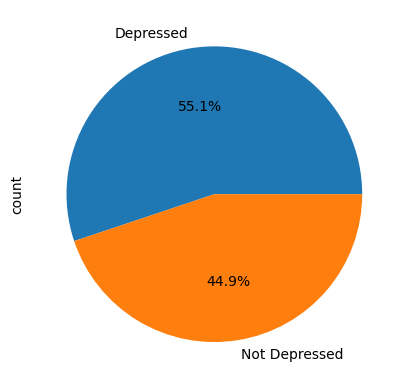

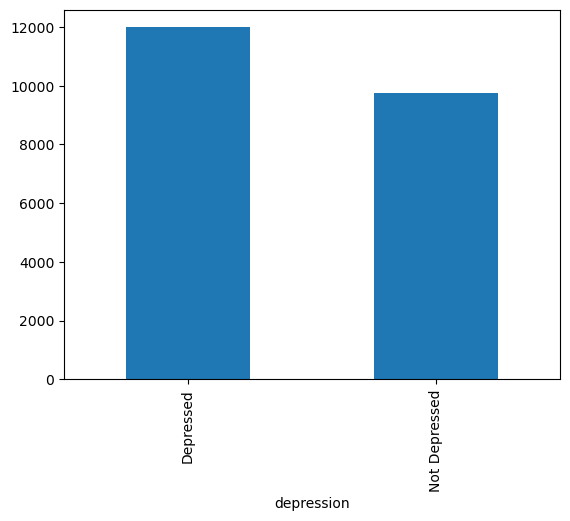

depression
Depressed        11994
Not Depressed     9758
Name: count, dtype: int64

In [525]:
## Understanding distribution of target
col_y = "depression"

## Plot Pie Chart
df[col_y].replace({1: 'Depressed', 0: 'Not Depressed'}).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Bar Chart
df[col_y].replace({1: 'Depressed', 0: 'Not Depressed'}).value_counts().plot(kind='bar')
plt.show()

## Tally Unique Values
df[col_y].replace({1: 'Depressed', 0: 'Not Depressed'}).value_counts()

## Plot histogram
# df[col_y].hist()
# plt.title(f"Distribution of prices")
# plt.suptitle('')  # Remove default title by Pandas
# plt.xlabel("Price")
# plt.ylabel("Number of laptops")
# plt.show()

### 2.3.1.2 Understanding distribution of features

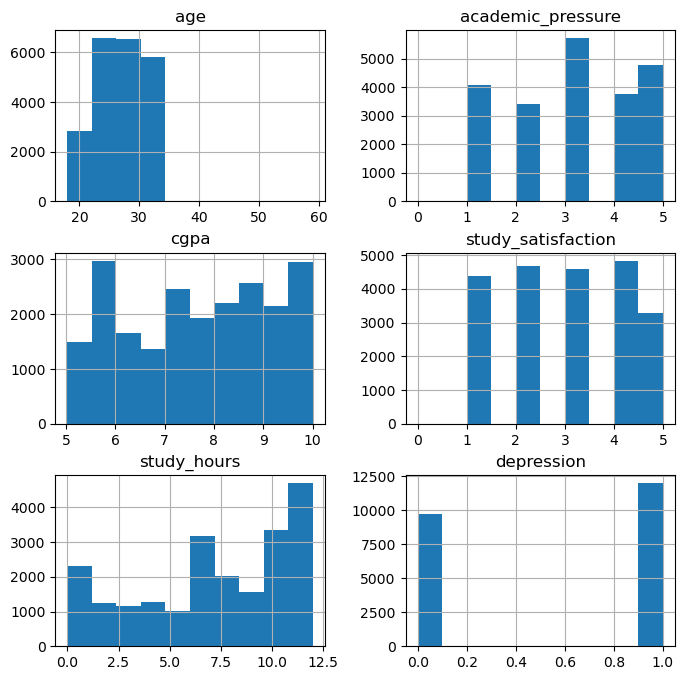

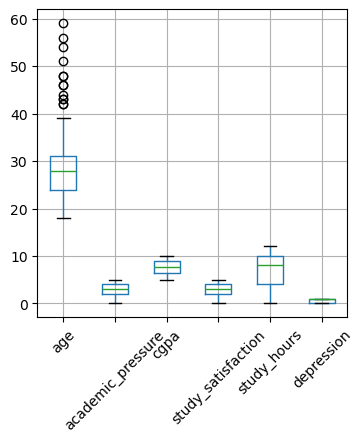

In [526]:
## Plot histogram
df.hist(figsize=(8,8))
plt.show()

## Plot boxplot for different features
df.boxplot(rot=45, figsize=(4, 4)) ## rot: rotation of label
plt.show()

### 2.4.2 Understanding relationship between variables

In [527]:
## Check datatypes for each column
col_numeric = df.select_dtypes(include=['float', 'int']).columns ## Select all categorical columns

## Display correlation matrix
df_corr = df[col_numeric].corr()
df_corr

,age,academic_pressure,cgpa,study_satisfaction,study_hours,depression
age,1.000000,-0.030426,-0.007474,0.071669,-0.032815,-0.198137
academic_pressure,-0.030426,1.000000,-0.020965,-0.119605,0.097218,0.474749
cgpa,-0.007474,-0.020965,1.000000,-0.049380,0.006005,0.031040
study_satisfaction,0.071669,-0.119605,-0.049380,1.000000,-0.043597,-0.188889
study_hours,-0.032815,0.097218,0.006005,-0.043597,1.000000,0.208706
depression,-0.198137,0.474749,0.031040,-0.188889,0.208706,1.000000


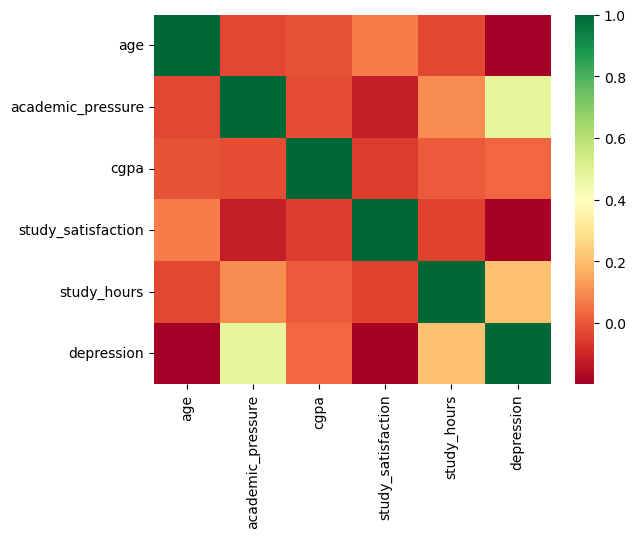

In [528]:
## Plot heatmap
sns.heatmap(df_corr, cmap='RdYlGn')
plt.show()

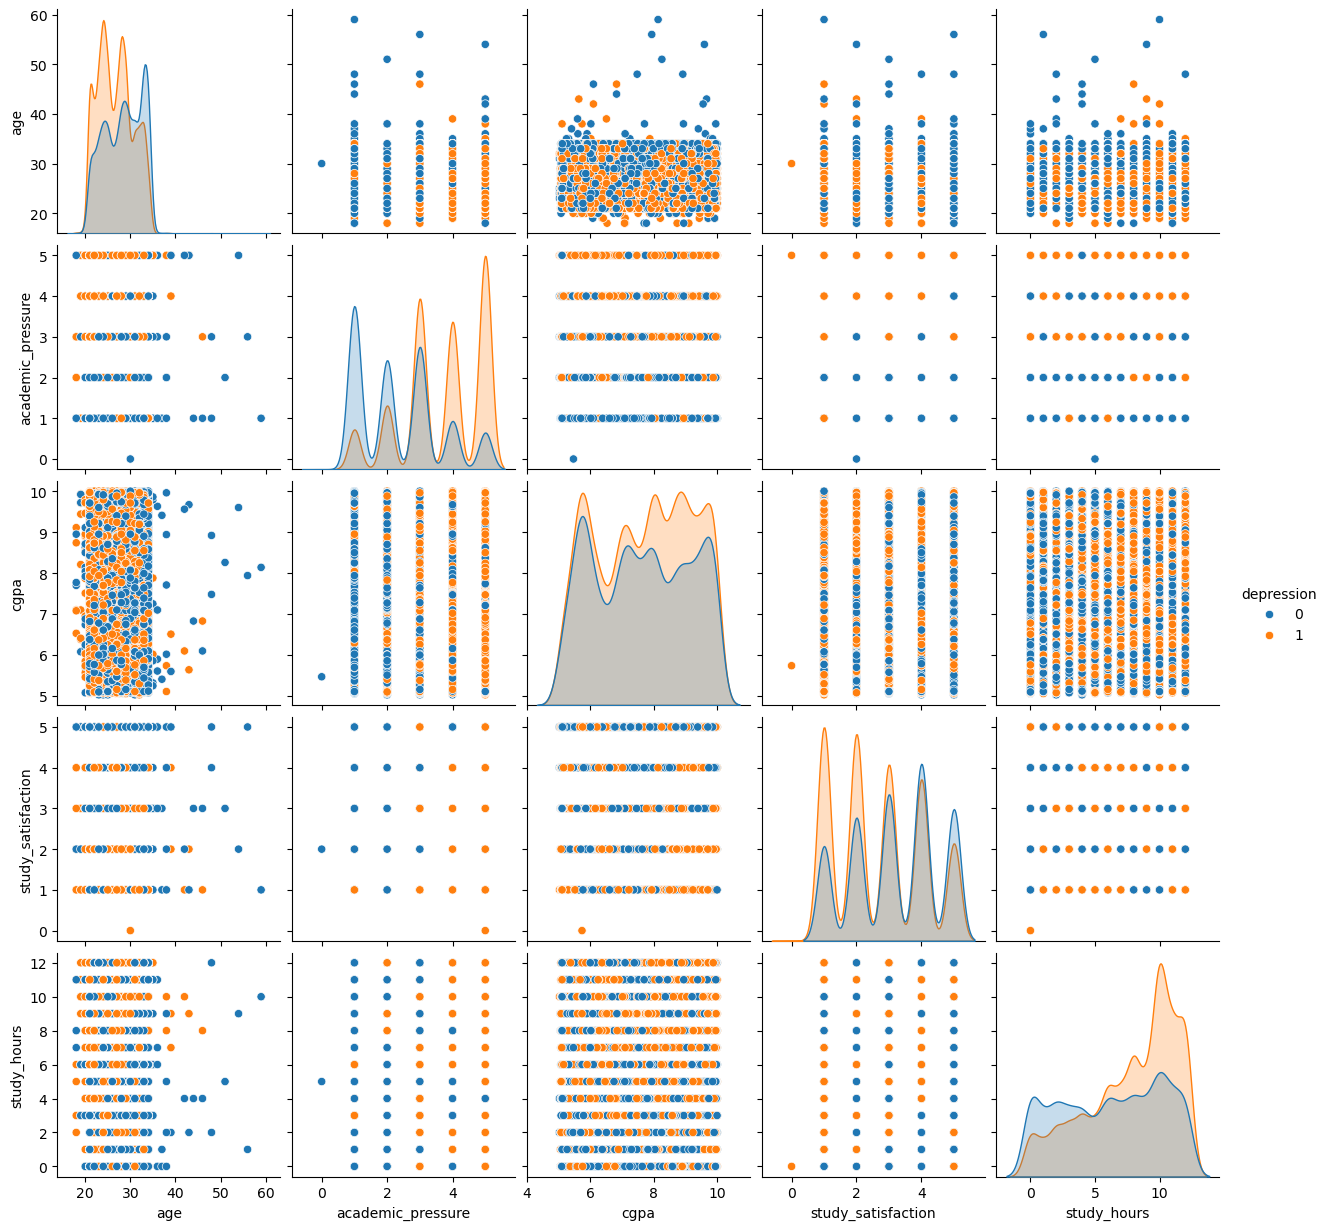

In [529]:
## Plot pairplot
sns.pairplot(df, hue=col_y)
plt.show()

# 3. Data Preparation

## 3.1 One Hot Encoding

In [530]:
## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X = df.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

,age,academic_pressure,cgpa,study_satisfaction,study_hours,gender_Male,sleep_duration_'7-8 hours',sleep_duration_'Less than 5 hours',sleep_duration_'More than 8 hours',dietary_habits_Moderate,...,degree_ME,degree_MHM,degree_MSc,degree_PhD,suicidal_thoughts_Yes,financial_stress_2.0,financial_stress_3.0,financial_stress_4.0,financial_stress_5.0,family_history_Yes
0,33.0,5.0,8.97,2.0,3.0,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,24.0,2.0,5.90,5.0,3.0,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,True
2,31.0,3.0,7.03,5.0,9.0,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,5.59,2.0,4.0,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,True
4,25.0,4.0,8.13,3.0,1.0,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,23.0,3.0,6.00,2.0,12.0,True,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
27895,31.0,2.0,7.27,5.0,6.0,True,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
27897,27.0,2.0,9.40,3.0,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,True
27898,31.0,3.0,6.61,4.0,12.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


# 3.2 Curse Of Dimensionality Check

In [531]:
## Sample 50 random rows for code output display
num_sample = 50
df_cod = df
df_cod_sample = df_cod.sample(num_sample, random_state=2026)
df_cod_sample

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_history,depression
24827,Male,31.0,3.0,9.21,5.0,'7-8 hours',Moderate,BE,Yes,12.0,3.0,Yes,1
14206,Male,22.0,5.0,5.61,2.0,'5-6 hours',Unhealthy,MBA,No,7.0,1.0,No,1
5574,Female,33.0,1.0,6.95,3.0,'Less than 5 hours',Moderate,B.Pharm,No,2.0,5.0,Yes,0
25042,Male,29.0,3.0,5.38,4.0,'More than 8 hours',Unhealthy,BE,Yes,6.0,5.0,No,1
8113,Female,27.0,4.0,5.57,5.0,'Less than 5 hours',Healthy,B.Tech,Yes,8.0,1.0,No,1
24556,Female,32.0,4.0,7.88,1.0,'7-8 hours',Unhealthy,LLB,No,6.0,4.0,Yes,0
20822,Female,33.0,4.0,6.17,2.0,'More than 8 hours',Moderate,MCA,No,9.0,1.0,Yes,0
25191,Female,30.0,2.0,7.80,5.0,'Less than 5 hours',Moderate,M.Com,Yes,6.0,2.0,No,0
479,Male,25.0,4.0,9.96,2.0,'Less than 5 hours',Healthy,MD,Yes,2.0,5.0,No,1
2597,Female,34.0,5.0,9.44,4.0,'5-6 hours',Moderate,M.Tech,Yes,10.0,2.0,No,1


In [532]:
## Visualize only 2 features
df_cod_sample['dummy_feature'] = 1
col_cod_X = 'cgpa'
col_cod_y = col_y
col_cod_z = 'dummy_feature'

import plotly.express as px
fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

Observations:
1. All the dots are smashed onto a single flat "floor".
2. The points look crowded and close together.
3. This means the model can easily find neighbors.

In [533]:
## Visualize 3 Features with sample size
col_cod_X = 'cgpa'
col_cod_y = col_y
col_cod_z = 'study_hours'

fig = px.scatter_3d(df_cod_sample, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

Observations:
1. The dots float up into the air, spreading out vertically based on study hours
2. Spaces between dots increase
3. Curse of dimensionality is present with sample size

In [534]:
## Visualize 3 Features
col_cod_X = 'cgpa'
col_cod_y = col_y
col_cod_z = 'study_hours'

fig = px.scatter_3d(df_cod, 
                    x=col_cod_X, 
                    y=col_cod_y, 
                    z=col_cod_z,
                    size=col_cod_z)
fig.show()

Observations:
1. Visualisation shows high density
2. Spaces between dots decrease
3. data density remains high enough for the model to learn effectively

## 3.3 Train-Test Split

In [535]:
from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [536]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [537]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [538]:
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [539]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

# 5. Model Evaluation

In [540]:
# Making Predictions:
y_pred = logr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_gbt = gbt.predict(X_test)
y_pred_rf = rf.predict(X_test)

## Evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Logistic Regression
# Accuracy
print("Logistic Regression: ", accuracy_score(y_test, y_pred))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred))


## Save Model
import joblib
joblib.dump(logr, 'depression_lr_model.pkl') ## Save Logistic

Logistic Regression:  0.8437021146184492


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2381                       576
Actual: Depressed (1)                     444                      3125


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2957
           1       0.84      0.88      0.86      3569

    accuracy                           0.84      6526
   macro avg       0.84      0.84      0.84      6526
weighted avg       0.84      0.84      0.84      6526



['depression_lr_model.pkl']

In [541]:
## Decision Tree Classifier
# Accuracy
print("Decision Tree: ", accuracy_score(y_test, y_pred_dt))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred_dt))

## Save Model
import joblib
joblib.dump(dt, 'depression_dt_model.pkl') ## Save Decision Tree model

Decision Tree:  0.7759730309531107


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2210                       747
Actual: Depressed (1)                     715                      2854


Classification Report
              precision    recall  f1-score   support

           0       0.76      0.75      0.75      2957
           1       0.79      0.80      0.80      3569

    accuracy                           0.78      6526
   macro avg       0.77      0.77      0.77      6526
weighted avg       0.78      0.78      0.78      6526



['depression_dt_model.pkl']

In [542]:
## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test, y_pred_gbt))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred_gbt))

## Save Model
import joblib
joblib.dump(gbt, 'depression_gbt_model.pkl') ## Save Gradient Boosting model

Gradient Boosting:  0.8453876800490346


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2388                       569
Actual: Depressed (1)                     440                      3129


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.84      0.84      6526
weighted avg       0.85      0.85      0.85      6526



['depression_gbt_model.pkl']

In [543]:
## Random Forest Classifier
# Accuracy
print("Random Forest: ", accuracy_score(y_test, y_pred_rf))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred_rf))

## Save Model
import joblib
joblib.dump(rf, 'depression_rf_model.pkl') ## Save Random Forest model

Random Forest:  0.8360404535703341


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2373                       584
Actual: Depressed (1)                     486                      3083


Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2957
           1       0.84      0.86      0.85      3569

    accuracy                           0.84      6526
   macro avg       0.84      0.83      0.83      6526
weighted avg       0.84      0.84      0.84      6526



['depression_rf_model.pkl']

#### Model Selection: Gradient Boosting Classifier
 I selected the Gradient Boosting Classifier as the final model primarily due to its exceptional performance in Recall (88%), which is the most critical metric for minimizing False Negatives in a mental health context. High Recall ensures the model successfully identifies the vast majority of at-risk students, preventing the dangerous scenario where a depressed student is incorrectly classified as healthy and denied necessary help. While Logistic Regression posted a statistically negligible difference in raw False Negatives (missing only 4 fewer cases out of over 6,500 students), Gradient Boosting demonstrated superior stability by achieving the highest Overall Accuracy (84.52%) and better Precision (85%). This higher Precision is crucial for a real-world dashboard application, as it mitigates the "False Positive" problem, ensuring that school counselors are not overwhelmed by false alarms from healthy students. Therefore, Gradient Boosting offers the most robust solution, effectively balancing the safety requirement of catching depressed students with the efficiency needed for a reliable diagnostic tool.

## Iterative model development


### Iteration 1: Feature Engineering

#### Feature Experiment with Categorically Grouping Features for Degree's
Rationale:
- Stress usually compounds. A student with high Academic Pressure AND high Financial Stress is at much higher risk than someone with just one.
- Studying 10 hours is fine if you sleep 8 hours. But studying 10 hours with only 4 hours of sleep is dangerous and can lead to burnout and can be a cause of depression.

Observations:
- Metrics including recall dipped slightly
- Doesn't fully prove that Feature is useless
- Can improve metrics with inclusion of other Engineered Features

In [544]:
df_experiment = df.copy()

## Total Stress Score Calculation
financial_stress_numeric = pd.to_numeric(df_experiment['financial_stress'])
df_experiment['total_stress'] = df_experiment['academic_pressure'] + financial_stress_numeric

## Burnout Ratio Calculation
sleep_map = {
    "'Less than 5 hours'": 4,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9,
}
sleep_numeric = df_experiment['sleep_duration'].map(sleep_map)
df_experiment['burnout_ratio'] = df_experiment['study_hours'] / (sleep_numeric + 0.1)

df_experiment

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_history,depression,total_stress,burnout_ratio
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,6.0,0.535714
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,4.0,0.535714
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,4.0,2.195122
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,8.0,0.526316
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,5.0,0.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Male,23.0,3.0,6.00,2.0,'More than 8 hours',Healthy,MBBS,Yes,12.0,4.0,No,0,7.0,1.318681
27895,Male,31.0,2.0,7.27,5.0,'7-8 hours',Moderate,B.Com,Yes,6.0,1.0,Yes,0,3.0,0.789474
27897,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0,5.0,0.000000
27898,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0,5.0,2.142857


In [545]:
## Split data into features (X) and target (y)
y_experiment = df_experiment[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X_experiment = df_experiment.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X_experiment = pd.get_dummies(X_experiment, 
               drop_first=True ## Remove redundant information
               )
X_experiment

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train_experiment, X_test_experiment, y_train_experiment, y_test_experiment = train_test_split(X_experiment, 
                                                    y_experiment, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train_experiment, y_train_experiment)

y_pred_gbt_experiment = gbt.predict(X_test_experiment)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test_experiment, y_pred_gbt_experiment))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test_experiment, y_pred_gbt_experiment)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test_experiment, y_pred_gbt_experiment))

Gradient Boosting:  0.8449279803861477


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2396                       561
Actual: Depressed (1)                     451                      3118


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.87      0.86      3569

    accuracy                           0.84      6526
   macro avg       0.84      0.84      0.84      6526
weighted avg       0.84      0.84      0.84      6526



#### Feature Experiment with Categorically Grouping Features for Degree's

Rationale:
- Each Programme has a different level of workload
- A Master's Degree may be more stressful compared to a Bachelor's Degree
- Fields of Study also can be taken into consideration
- A medical field may have a higher rate of depression compared to say a architecture field

Observations:
- Metrics including recall dipped slightly
- Doesn't fully prove that Feature is useless
- Can improve metrics with inclusion of other Engineered Features

In [546]:
df_experiment = df.copy()

def programme_type(degree):
    degree = degree.replace("'", "")
    # Bachelor's Degree
    if degree in ['B.Tech', 'BE', 'BCA', 'B.Arch', 'BSc', 'B.Com', 'BBA', 'BHM', 'BA', 'LLB', 'B.Ed', 'MBBS', 'MD', 'B.Pharm']:
        return "Bachelor's"
    
    # Master's Degree
    elif degree in ['M.Tech', 'ME', 'MCA', 'MSc', 'M.Com', 'MBA', 'MHM', 'MA', 'LLM', 'M.Ed', 'M.Pharm']:
        return "Master's"
    
    # Doctorate Degree
    elif degree in ['PhD']:
        return "Doctorate"
    
def field_of_study(degree):
    degree = degree.replace("'", "")

    # 1. Engineering
    if degree in ['BE', 'ME']:
        return 'Engineering'
    
    # 2. Technology
    elif degree in ['B.Tech', 'M.Tech']:
        return 'Technology'
    
    # 3. Computer Applications
    elif degree in ['BCA', 'MCA']:
        return 'Computer Applications'
    
    # 4. Architecture
    elif degree in ['B.Arch']:
        return 'Architecture'
    
    # 5. Science
    elif degree in ['BSc', 'MSc']:
        return 'Science'
    
    # 6. Commerce
    elif degree in ['B.Com', 'M.Com']:
        return 'Commerce'
    
    # 7. Business Administration
    elif degree in ['BBA', 'MBA']:
        return 'Business Administration'
    
    # 8. Hospitality Management
    elif degree in ['BHM', 'MHM']:
        return 'Hospitality Management'
    
    # 9. Arts
    elif degree in ['BA', 'MA']:
        return 'Arts'
    
    # 10. Law
    elif degree in ['LLB', 'LLM']:
        return 'Law'
    
    # 11. Education
    elif degree in ['B.Ed', 'M.Ed']:
        return 'Education'
    
    # 12. Medical
    elif degree in ['MBBS', 'MD']:
        return 'Medical'
    
    # 13. Pharmacy
    elif degree in ['B.Pharm', 'M.Pharm']:
        return 'Pharmacy'
    
    # 14. Doctorate
    elif degree in ['PhD']:
        return 'Doctorate Studies'
    

df_experiment['programme_type'] = df_experiment['degree'].apply(programme_type)
df_experiment['field_of_study'] = df_experiment['degree'].apply(field_of_study)

df_experiment = df_experiment.drop(columns=['degree'])

print("New Fields of Study:\n", df_experiment['field_of_study'].value_counts())
print("New Programme Types:\n", df_experiment['programme_type'].value_counts())

New Fields of Study:
 field_of_study
Education                  2682
Computer Applications      2472
Commerce                   2238
Technology                 2171
Science                    2075
Architecture               1476
Pharmacy                   1390
Medical                    1267
Business Administration    1256
Law                        1152
Arts                       1141
Hospitality Management     1116
Engineering                 796
Doctorate Studies           520
Name: count, dtype: int64
New Programme Types:
 programme_type
Bachelor's    13886
Master's       7346
Doctorate       520
Name: count, dtype: int64


In [547]:
## Split data into features (X) and target (y)
y_experiment = df_experiment[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X_experiment = df_experiment.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X_experiment = pd.get_dummies(X_experiment, 
               drop_first=True ## Remove redundant information
               )
X_experiment

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train_experiment, X_test_experiment, y_train_experiment, y_test_experiment = train_test_split(X_experiment, 
                                                    y_experiment, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train_experiment, y_train_experiment)

y_pred_gbt_experiment = gbt.predict(X_test_experiment)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test_experiment, y_pred_gbt_experiment))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test_experiment, y_pred_gbt_experiment)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test_experiment, y_pred_gbt_experiment))

Gradient Boosting:  0.8447747471651854


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2391                       566
Actual: Depressed (1)                     447                      3122


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.87      0.86      3569

    accuracy                           0.84      6526
   macro avg       0.84      0.84      0.84      6526
weighted avg       0.84      0.84      0.84      6526



#### Feature Experiment with Sleep Duration Numeric Conversion

Rationale:
- Sleep duration is ordinal, so numerical encoding preserves the natural ordering
- Reduces sparsity compared to one hot encoding

Observation
- All metrics were unchanged
- However this does not mean the feature is useless
- Combination with other Engineered Features can improve results

In [548]:
## Copy original dataframe
df_experiment = df.copy()

## Map sleep duration to numeric values (using midpoints for ranges)
sleep_map = {
  "'Less than 5 hours'": 4,
  "'5-6 hours'": 5.5,
  "'7-8 hours'": 7.5,
  "'More than 8 hours'": 9,
  "Less than 5 hours": 4,
  "5-6 hours": 5.5,
  "7-8 hours": 7.5,
  "More than 8 hours": 9,
}

## Apply sleep duration to numeric and handle missing values
df_experiment['sleep_duration'] = df_experiment['sleep_duration'].map(sleep_map)
df_experiment['sleep_duration'] = df_experiment['sleep_duration'].fillna(df_experiment['sleep_duration'].mean())

df_experiment

,gender,age,academic_pressure,cgpa,study_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,study_hours,financial_stress,family_history,depression
0,Male,33.0,5.0,8.97,2.0,5.5,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,5.5,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,4.0,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,7.5,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,5.5,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Male,23.0,3.0,6.00,2.0,9.0,Healthy,MBBS,Yes,12.0,4.0,No,0
27895,Male,31.0,2.0,7.27,5.0,7.5,Moderate,B.Com,Yes,6.0,1.0,Yes,0
27897,Male,27.0,2.0,9.40,3.0,4.0,Healthy,MSc,No,0.0,3.0,Yes,0
27898,Male,31.0,3.0,6.61,4.0,5.5,Unhealthy,MD,No,12.0,2.0,No,0


In [549]:
## Split data into features (X) and target (y)
y_experiment = df_experiment[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X_experiment = df_experiment.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X_experiment = pd.get_dummies(X_experiment, 
               drop_first=True ## Remove redundant information
               )
X_experiment

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train_experiment, X_test_experiment, y_train_experiment, y_test_experiment = train_test_split(X_experiment, 
                                                    y_experiment, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train_experiment, y_train_experiment)

y_pred_gbt_experiment = gbt.predict(X_test_experiment)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test_experiment, y_pred_gbt_experiment))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test_experiment, y_pred_gbt_experiment)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test_experiment, y_pred_gbt_experiment))

Gradient Boosting:  0.8453876800490346


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2388                       569
Actual: Depressed (1)                     440                      3129


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.84      0.84      6526
weighted avg       0.85      0.85      0.85      6526



#### Feature Experiment with Combining all Engineered Features

Observations:
- A measurable improvement in accurate
- Accuracy increase to 84.72% compared to the base model of 84.47%
- There were 16 less False Positives
- However, there were 4 more False Negatives which can be costly
- Recall Metric did not dip for both Depressed and Not Depressed
- Considered a successful feature engineering with the increase of accuracy

In [550]:
## Copy original dataframe
df_experiment = df.copy()

sleep_map = {
    "'Less than 5 hours'": 4,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9,
    # Add fallback for potential missing quotes if data cleaning changed
    "Less than 5 hours": 4, 
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
}

## Financial Stress and Burnout Ratio Features
df_experiment['financial_stress'] = pd.to_numeric(df_experiment['financial_stress'], errors='coerce')
df_experiment['total_stress'] = df_experiment['academic_pressure'] + df_experiment['financial_stress']
sleep_numeric = df_experiment['sleep_duration'].map(sleep_map)
sleep_numeric = sleep_numeric.fillna(sleep_numeric.mean())
df_experiment['burnout_ratio'] = df_experiment['study_hours'] / (sleep_numeric + 0.1)

## Sleep Duration Numeric Conversion
df_experiment['sleep_duration'] = df_experiment['sleep_duration'].map(sleep_map)
df_experiment['sleep_duration'] = df_experiment['sleep_duration'].fillna(df_experiment['sleep_duration'].mean())

## Categorical Grouping Features for Degree's
def programme_type(degree):
    degree = degree.replace("'", "")
    # Bachelor's Degree
    if degree in ['B.Tech', 'BE', 'BCA', 'B.Arch', 'BSc', 'B.Com', 'BBA', 'BHM', 'BA', 'LLB', 'B.Ed', 'MBBS', 'MD', 'B.Pharm']:
        return "Bachelor's"
    
    # Master's Degree
    elif degree in ['M.Tech', 'ME', 'MCA', 'MSc', 'M.Com', 'MBA', 'MHM', 'MA', 'LLM', 'M.Ed', 'M.Pharm']:
        return "Master's"
    
    # Doctorate Degree
    elif degree in ['PhD']:
        return "Doctorate"
    
def field_of_study(degree):
    degree = degree.replace("'", "")

    # 1. Engineering
    if degree in ['BE', 'ME']:
        return 'Engineering'
    
    # 2. Technology
    elif degree in ['B.Tech', 'M.Tech']:
        return 'Technology'
    
    # 3. Computer Applications
    elif degree in ['BCA', 'MCA']:
        return 'Computer Applications'
    
    # 4. Architecture
    elif degree in ['B.Arch']:
        return 'Architecture'
    
    # 5. Science
    elif degree in ['BSc', 'MSc']:
        return 'Science'
    
    # 6. Commerce
    elif degree in ['B.Com', 'M.Com']:
        return 'Commerce'
    
    # 7. Business Administration
    elif degree in ['BBA', 'MBA']:
        return 'Business Administration'
    
    # 8. Hospitality Management
    elif degree in ['BHM', 'MHM']:
        return 'Hospitality Management'
    
    # 9. Arts
    elif degree in ['BA', 'MA']:
        return 'Arts'
    
    # 10. Law
    elif degree in ['LLB', 'LLM']:
        return 'Law'
    
    # 11. Education
    elif degree in ['B.Ed', 'M.Ed']:
        return 'Education'
    
    # 12. Medical
    elif degree in ['MBBS', 'MD']:
        return 'Medical'
    
    # 13. Pharmacy
    elif degree in ['B.Pharm', 'M.Pharm']:
        return 'Pharmacy'
    
    # 14. Doctorate
    elif degree in ['PhD']:
        return 'Doctorate Studies'
    

df_experiment['programme_type'] = df_experiment['degree'].apply(programme_type)
df_experiment['field_of_study'] = df_experiment['degree'].apply(field_of_study)

df_experiment = df_experiment.drop(columns=['degree'])

# Check new columns
print(df_experiment.columns)

Index(['gender', 'age', 'academic_pressure', 'cgpa', 'study_satisfaction',
       'sleep_duration', 'dietary_habits', 'suicidal_thoughts', 'study_hours',
       'financial_stress', 'family_history', 'depression', 'total_stress',
       'burnout_ratio', 'programme_type', 'field_of_study'],
      dtype='object')


In [551]:
## Split data into features (X) and target (y)
y_experiment = df_experiment[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X_experiment = df_experiment.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X_experiment = pd.get_dummies(X_experiment, 
               drop_first=True ## Remove redundant information
               )
X_experiment

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train_experiment, X_test_experiment, y_train_experiment, y_test_experiment = train_test_split(X_experiment, 
                                                    y_experiment, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train_experiment, y_train_experiment)

y_pred_gbt_experiment = gbt.predict(X_test_experiment)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test_experiment, y_pred_gbt_experiment))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test_experiment, y_pred_gbt_experiment)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test_experiment, y_pred_gbt_experiment))

Gradient Boosting:  0.8472264787005823


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2404                       553
Actual: Depressed (1)                     444                      3125


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.84      0.85      6526
weighted avg       0.85      0.85      0.85      6526



#### Applying Engineered Features

In [552]:

sleep_map = {
    "'Less than 5 hours'": 4,
    "'5-6 hours'": 5.5,
    "'7-8 hours'": 7.5,
    "'More than 8 hours'": 9,
    # Add fallback for potential missing quotes if data cleaning changed
    "Less than 5 hours": 4, 
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9,
}

## Financial Stress and Burnout Ratio Features
df['financial_stress'] = pd.to_numeric(df['financial_stress'], errors='coerce')
df['total_stress'] = df['academic_pressure'] + df['financial_stress']
sleep_numeric = df['sleep_duration'].map(sleep_map)
df['burnout_ratio'] = df['study_hours'] / (sleep_numeric + 0.1)

## Sleep Duration Numeric Conversion
df['sleep_duration'] = df['sleep_duration'].map(sleep_map)
df['sleep_duration'] = df['sleep_duration'].fillna(df['sleep_duration'].mean())

## Categorical Grouping Features for Degree's
def programme_type(degree):
    degree = degree.replace("'", "")
    # Bachelor's Degree
    if degree in ['B.Tech', 'BE', 'BCA', 'B.Arch', 'BSc', 'B.Com', 'BBA', 'BHM', 'BA', 'LLB', 'B.Ed', 'MBBS', 'MD', 'B.Pharm']:
        return "Bachelor's"
    
    # Master's Degree
    elif degree in ['M.Tech', 'ME', 'MCA', 'MSc', 'M.Com', 'MBA', 'MHM', 'MA', 'LLM', 'M.Ed', 'M.Pharm']:
        return "Master's"
    
    # Doctorate Degree
    elif degree in ['PhD']:
        return "Doctorate"
    
def field_of_study(degree):
    degree = degree.replace("'", "")

    # 1. Engineering
    if degree in ['BE', 'ME']:
        return 'Engineering'
    
    # 2. Technology
    elif degree in ['B.Tech', 'M.Tech']:
        return 'Technology'
    
    # 3. Computer Applications
    elif degree in ['BCA', 'MCA']:
        return 'Computer Applications'
    
    # 4. Architecture
    elif degree in ['B.Arch']:
        return 'Architecture'
    
    # 5. Science
    elif degree in ['BSc', 'MSc']:
        return 'Science'
    
    # 6. Commerce
    elif degree in ['B.Com', 'M.Com']:
        return 'Commerce'
    
    # 7. Business Administration
    elif degree in ['BBA', 'MBA']:
        return 'Business Administration'
    
    # 8. Hospitality Management
    elif degree in ['BHM', 'MHM']:
        return 'Hospitality Management'
    
    # 9. Arts
    elif degree in ['BA', 'MA']:
        return 'Arts'
    
    # 10. Law
    elif degree in ['LLB', 'LLM']:
        return 'Law'
    
    # 11. Education
    elif degree in ['B.Ed', 'M.Ed']:
        return 'Education'
    
    # 12. Medical
    elif degree in ['MBBS', 'MD']:
        return 'Medical'
    
    # 13. Pharmacy
    elif degree in ['B.Pharm', 'M.Pharm']:
        return 'Pharmacy'
    
    # 14. Doctorate
    elif degree in ['PhD']:
        return 'Doctorate Studies'
    

df['programme_type'] = df['degree'].apply(programme_type)
df['field_of_study'] = df['degree'].apply(field_of_study)

df = df.drop(columns=['degree'])

##### Final Model Evaluation

In [553]:
## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X = df.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train, y_train)

y_pred_gbt = gbt.predict(X_test)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test, y_pred_gbt))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred_gbt))

Gradient Boosting:  0.8472264787005823


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2404                       553
Actual: Depressed (1)                     444                      3125


Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.84      0.85      6526
weighted avg       0.85      0.85      0.85      6526



### Iteration 2: Feature Selection

In [554]:
## Feature Importance from Gradient Boosting Tree
df_gbt_feat_impt = pd.DataFrame({
                                  'Feature': gbt.feature_names_in_,
                                  'Importance': gbt.feature_importances_
                                }).sort_values(by='Importance', ascending=False)

df_gbt_feat_impt['Cumulative Importance'] = df_gbt_feat_impt['Importance'].cumsum()

df_gbt_feat_impt

,Feature,Importance,Cumulative Importance
12,suicidal_thoughts_Yes,0.502526,0.502526
7,total_stress,0.306447,0.808974
1,academic_pressure,0.057643,0.866617
0,age,0.040001,0.906618
8,burnout_ratio,0.033786,0.940404
11,dietary_habits_Unhealthy,0.021747,0.962151
3,study_satisfaction,0.019837,0.981988
2,cgpa,0.004816,0.986805
10,dietary_habits_Moderate,0.003545,0.990350
5,study_hours,0.002124,0.992474


C:\Users\tengj\AppData\Local\Temp\ipykernel_31328\2184279109.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



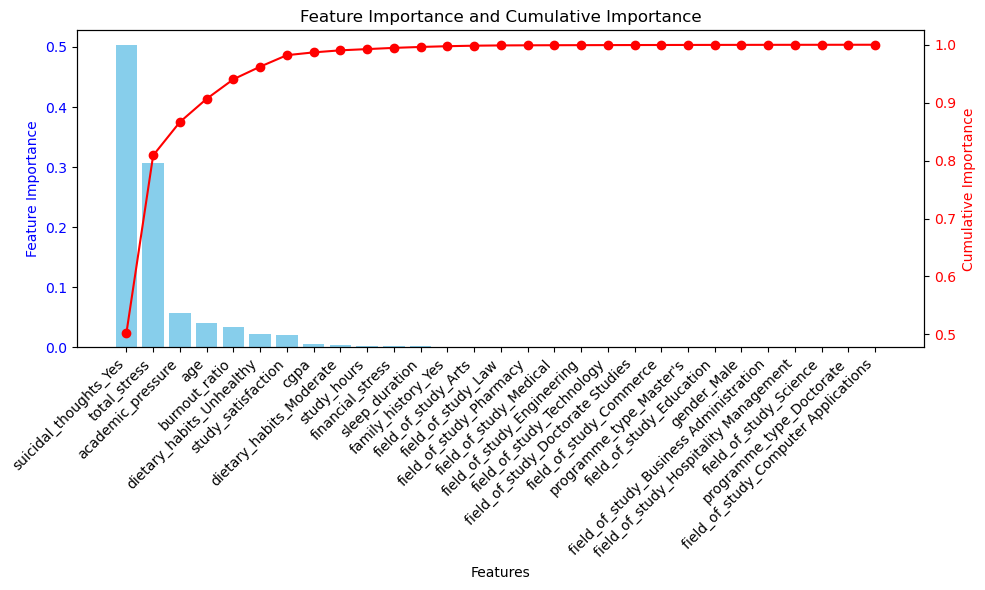

In [555]:
## Plot feature importance and cumulative importance
fig, ax1 = plt.subplots(figsize=(10, 6))
 
# Bar chart for feature importance
ax1.bar(df_gbt_feat_impt['Feature'], df_gbt_feat_impt['Importance'], color='skyblue')
ax1.set_xlabel('Features')
ax1.set_ylabel('Feature Importance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(df_gbt_feat_impt['Feature'], rotation=45, ha='right')
 
# Line chart for cumulative importance
ax2 = ax1.twinx()
ax2.plot(df_gbt_feat_impt['Feature'], df_gbt_feat_impt['Cumulative Importance'], color='red', marker='o')
ax2.set_ylabel('Cumulative Importance', color='red')
ax2.tick_params(axis='y', labelcolor='red')
 
plt.title('Feature Importance and Cumulative Importance')
plt.tight_layout()
plt.show()

#### Feature Experiment with Dropping Features with Cumulative Importance > 0.9962

Observations:
- After dropping features with Cumulative important of more than 0.9962
- This refers to family_history_Yes onwards
- Accuracy improved from 84.72% to 84.89%
- Recall improved from 444 False Positives to 432 False Positives
- However, increased by 1 from 553 False Negatives to 554
- All in all the increase by 1 in False Negative is forgivable as it has a much less impact towards depression as compared to having more False Positives

In [556]:
## Drop features with cumulative importance > 0.997
df_experiment = df.copy()

threshold = 0.9962
features_to_keep = df_gbt_feat_impt[df_gbt_feat_impt['Cumulative Importance'] <= threshold]['Feature'].tolist()

df_experiment = X[features_to_keep].copy()
df_experiment[col_y] = y

df_experiment

,suicidal_thoughts_Yes,total_stress,academic_pressure,age,burnout_ratio,dietary_habits_Unhealthy,study_satisfaction,cgpa,dietary_habits_Moderate,study_hours,financial_stress,sleep_duration,depression
0,True,6.0,5.0,33.0,0.535714,False,2.0,8.97,False,3.0,1.0,5.5,1
1,False,4.0,2.0,24.0,0.535714,False,5.0,5.90,True,3.0,2.0,5.5,0
2,False,4.0,3.0,31.0,2.195122,False,5.0,7.03,False,9.0,1.0,4.0,0
3,True,8.0,3.0,28.0,0.526316,False,2.0,5.59,True,4.0,5.0,7.5,1
4,True,5.0,4.0,25.0,0.178571,False,3.0,8.13,True,1.0,1.0,5.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,True,7.0,3.0,23.0,1.318681,False,2.0,6.00,False,12.0,4.0,9.0,0
27895,True,3.0,2.0,31.0,0.789474,False,5.0,7.27,True,6.0,1.0,7.5,0
27897,False,5.0,2.0,27.0,0.000000,False,3.0,9.40,False,0.0,3.0,4.0,0
27898,False,5.0,3.0,31.0,2.142857,True,4.0,6.61,False,12.0,2.0,5.5,0


In [557]:
## Split data into features (X) and target (y)
y_experiment = df_experiment[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X_experiment = df_experiment.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X_experiment = pd.get_dummies(X_experiment, 
               drop_first=True ## Remove redundant information
               )
X_experiment

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train_experiment, X_test_experiment, y_train_experiment, y_test_experiment = train_test_split(X_experiment, 
                                                    y_experiment, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train_experiment, y_train_experiment)

y_pred_gbt_experiment = gbt.predict(X_test_experiment)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test_experiment, y_pred_gbt_experiment))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test_experiment, y_pred_gbt_experiment)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test_experiment, y_pred_gbt_experiment))

Gradient Boosting:  0.8489120441311676


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2403                       554
Actual: Depressed (1)                     432                      3137


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.85      0.85      6526
weighted avg       0.85      0.85      0.85      6526



#### Applying Feature Selection

In [579]:
## Drop features with cumulative importance > 0.997

threshold = 0.9962
features_to_keep = df_gbt_feat_impt[df_gbt_feat_impt['Cumulative Importance'] <= threshold]['Feature'].tolist()

df = X[features_to_keep].copy()
df[col_y] = y

## Split data into features (X) and target (y)
y = df[col_y] ## Select target column 

col_irrelevant = [col_y, 'depression']

X = df.drop(col_irrelevant, axis=1) ## Select feature columns 

## One-Hot Encoding
X = pd.get_dummies(X, 
               drop_first=True ## Remove redundant information
               )
X

from sklearn.model_selection import train_test_split

## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

gbt = GradientBoostingClassifier()

gbt.fit(X_train, y_train)

y_pred_gbt = gbt.predict(X_test)

## Gradient Boosting Classifier
# Accuracy
print("Gradient Boosting: ", accuracy_score(y_test, y_pred_gbt))

print("\n")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)

print("\n")

# Detailed Report (Precision, Recall, F1-Score)
print("Classification Report")
print(classification_report(y_test, y_pred_gbt))

Gradient Boosting:  0.8489120441311676


Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2403                       554
Actual: Depressed (1)                     432                      3137


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.85      0.85      6526
weighted avg       0.85      0.85      0.85      6526



### Iteration 3: Hyperparameter Tuning

#### First Tuning With Base Parameters

Observations: Underfitted
- While Recall for Depressed (1) is high (0.87), the Recall for Not Depressed (0) is low (0.76).
- Accuracy has dropped to 82.04%
- The model is essentially guessing Depressed (1) too often because it isn't complex enough to distinguish the Healthy cases accurately.

Next Step:
- Increase the n_estimators range and max_depth to facilitate a balanced fitted model.

#### Second Tuning With Increased Range to prevent Underfitting

Observations: Well Balanced Fitting
- Unlike the previous iteration, the Precision and Recall are now balanced for both Depressed (1), and Not Depressed (0). 
- This indicates the model is correctly identifying the majority of depressed students without generating excessive false alarms.
- A interesting 'best parameter' observation was that the max_depth was 1, which indicates that the model is using simple trees with single splits. 
- However, the n_estimators were high with 182, combining 182 of these single splits to make a strong predictor.

In [ ]:
## Define parameter distribution
 
param_dist_gbt = {
    'n_estimators': [50, 100, 150],     
    'max_depth': [2, 3, 4],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 0.9, 1.0],
}
 
from sklearn.model_selection import RandomizedSearchCV
rs_gbt = RandomizedSearchCV(
    estimator = gbt,
    param_distributions = param_dist_gbt,
    cv = 3, ## Number of cross-validation folds
    scoring = 'accuracy', ## Scoring metric
    n_iter = 81, ## Number of parameter settings sampled
    n_jobs = -1 ## -1: Use all available cores
    )
 
rs_gbt.fit(X_train, y_train)
 
## Obtain best parameters and best estimator
best_rs_params = rs_gbt.best_params_
best_rs_gbt = rs_gbt.best_estimator_
print("Best Parameters: ", best_rs_params)
print("Best Estimator: ", best_rs_gbt)

## Evaluate model
y_pred_rs_gbt = best_rs_gbt.predict(X_test) ## Prediction using model 3

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rs_gbt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)
print("\n")

print("Tuned Gradient Boosting Trees Accuracy: ", accuracy_score(y_test, y_pred_rs_gbt))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_rs_gbt))

Best Parameters:  {'subsample': 1.0, 'n_estimators': 150, 'max_depth': 2, 'learning_rate': 0.15}
Best Estimator:  GradientBoostingClassifier(learning_rate=0.15, max_depth=2, n_estimators=150)
Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2400                       557
Actual: Depressed (1)                     433                      3136


Tuned Gradient Boosting Trees Accuracy:  0.8482991112473184

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.85      0.85      6526
weighted avg       0.85      0.85      0.85      6526



['depression_best_rs_gbt_model.pkl']

#### Applying Best Model Observations

In [590]:
param_dist_gbt = {
    'n_estimators': [150],
    'learning_rate': [0.15],
    'max_depth': [2],
    'subsample': [1]
}
 
rs_gbt = RandomizedSearchCV(
    estimator = gbt,
    param_distributions = param_dist_gbt,
    cv = 3, ## Number of cross-validation folds
    scoring = 'accuracy', ## Scoring metric
    n_iter = 1, ## Number of parameter settings sampled
    n_jobs = -1 ## -1: Use all available cores
    )
 
rs_gbt.fit(X_train, y_train)
 
# Save model
import joblib
joblib.dump(best_rs_gbt, 'depression_best_rs_gbt_model.pkl') ## Save Gradient Boosting Trees model

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gbt)

cm_table = pd.DataFrame(cm, 
                        index=['Actual: Healthy (0)', 'Actual: Depressed (1)'], 
                        columns=['Predicted: Healthy (0)', 'Predicted: Depressed (1)'])

print("Confusion Matrix", cm_table)
print("\n")

## Evaluate model
y_pred_rs_gbt = best_rs_gbt.predict(X_test) ## Prediction using model 3b
print("Tuned Gradient Boosting Trees Accuracy: ", accuracy_score(y_test, y_pred_rs_gbt))
print("\nClassification Report (Tuned):\n", classification_report(y_test, y_pred_rs_gbt))

# Save model
import joblib
joblib.dump(best_rs_gbt, 'depression_best_rs_gbt_model.pkl') ## Save Gradient Boosting Trees model

Confusion Matrix                        Predicted: Healthy (0)  Predicted: Depressed (1)
Actual: Healthy (0)                      2403                       554
Actual: Depressed (1)                     432                      3137


Tuned Gradient Boosting Trees Accuracy:  0.8482991112473184

Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      2957
           1       0.85      0.88      0.86      3569

    accuracy                           0.85      6526
   macro avg       0.85      0.85      0.85      6526
weighted avg       0.85      0.85      0.85      6526



['depression_best_rs_gbt_model.pkl']